# Neural Network Example

### Developing a 2-hidden layers fully connected neural network (multilayer perceptron) 

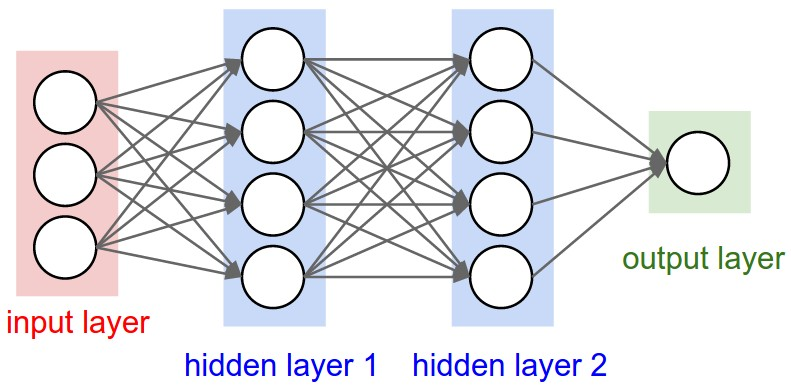

In this example we are using some of TensorFlow higher-level wrapper classes (tf.estimators, tf.layers, tf.metrics, ...). 
1. tf.estimators: Estimator class to train and evaluate TensorFlow models.
2. tf.layers: This library provides a set of high-level neural networks layers.
3. tf.metrics: Contain performace evaluation-related metrics.

In [12]:
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

print('Test shape:',mnist.test.images.shape)
print('Train shape:',mnist.train.images.shape)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Test shape: (10000, 784)
Train shape: (55000, 784)


In [19]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

### Building our tensorflow Graph

In [14]:
# Defining our Placeholder for the images & labels
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [15]:
# Defining multi-layer perceptron model
def multilayer_perceptron(x, weights, biases):
    print( 'x:', x.get_shape(), 'W1:', weights['h1'].get_shape(), 'b1:', biases['b1'].get_shape())        
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.relu(layer_1)

    # Hidden layer with RELU activation
    print( 'layer_1:', layer_1.get_shape(), 'W2:', weights['h2'].get_shape(), 'b2:', biases['b2'].get_shape())        
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.relu(layer_2)

    # Output layer with linear activation
    print( 'layer_2:', layer_2.get_shape(), 'W3:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())        
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    print('out_layer:',out_layer.get_shape())

    return out_layer

In [16]:
# Initialize weights and construct the model
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),    #784x256
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])), #256x256
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))  #256x10
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #256x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #256x1
    'out': tf.Variable(tf.random_normal([n_classes]))              #10x1
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

x: (?, 784) W1: (784, 256) b1: (256,)
layer_1: (?, 256) W2: (256, 256) b2: (256,)
layer_2: (?, 256) W3: (256, 10) b3: (10,)
out_layer: (?, 10)


In [18]:
# Define Loss function, and Optimizer

# Cross entropy loss function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

# On this case we choose the AdamOptimizer
# Compute individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients
# Appropriate for non-stationary objectives & for problems with very noisy/or sparse gradient, Invariant to diagonal rescale of the gradients
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### Launch graph

In [35]:
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    # To keep sizes compatible with model
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 162.937369055
Epoch: 0002 cost= 37.577835445
Epoch: 0003 cost= 23.930785534
Epoch: 0004 cost= 16.995655808
Epoch: 0005 cost= 12.291253413
Epoch: 0006 cost= 9.056166938
Epoch: 0007 cost= 6.771846190
Epoch: 0008 cost= 5.048019525
Epoch: 0009 cost= 3.678227040
Epoch: 0010 cost= 2.795690129
Epoch: 0011 cost= 2.088872750
Epoch: 0012 cost= 1.596066990
Epoch: 0013 cost= 1.106095413
Epoch: 0014 cost= 0.821402427
Epoch: 0015 cost= 0.775459428
Optimization Finished!
Accuracy: 0.9409
